In [1]:
# loading libraries

library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# reading data (from https://www.ultimatetennisstatistics.com/)

tennis_data <- read_csv("data/player_stats.csv")

# organizing/tidying data

colnames(tennis_data) = make.names(colnames(tennis_data))

tennis <- tennis_data |>
            # select(Age, Plays, Best.Rank, Backhand, Height, Favorite.Surface) |>  # Weight and Coach seem relevant, however there are too many missing values
            select(Best.Rank, Age, Height, Weight, Plays, Backhand, Favorite.Surface) |> # select relevant variables
            mutate(across(everything(), function(col) {gsub(" .*", "", col)})) |> # format cells
            mutate(across(Best.Rank:Weight, as.numeric)) |> # convert chr to dbl
            mutate(across(Plays:Favorite.Surface, as.factor)) # convert chr to fct
            # drop_na()
      
tennis

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Best.Rank,Age,Height,Weight,Plays,Backhand,Favorite.Surface
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
363,26,NA,NA,Right-handed,NA,NA
316,18,NA,NA,Left-handed,Two-handed,NA
44,32,185,NA,Right-handed,Two-handed,Fast
⋮,⋮,⋮,⋮,⋮,⋮,⋮
342,23,NA,NA,Left-handed,NA,NA
419,24,NA,NA,NA,NA,NA
408,22,NA,NA,Left-handed,Two-handed,NA


Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 385 rows containing missing values (geom_point).”


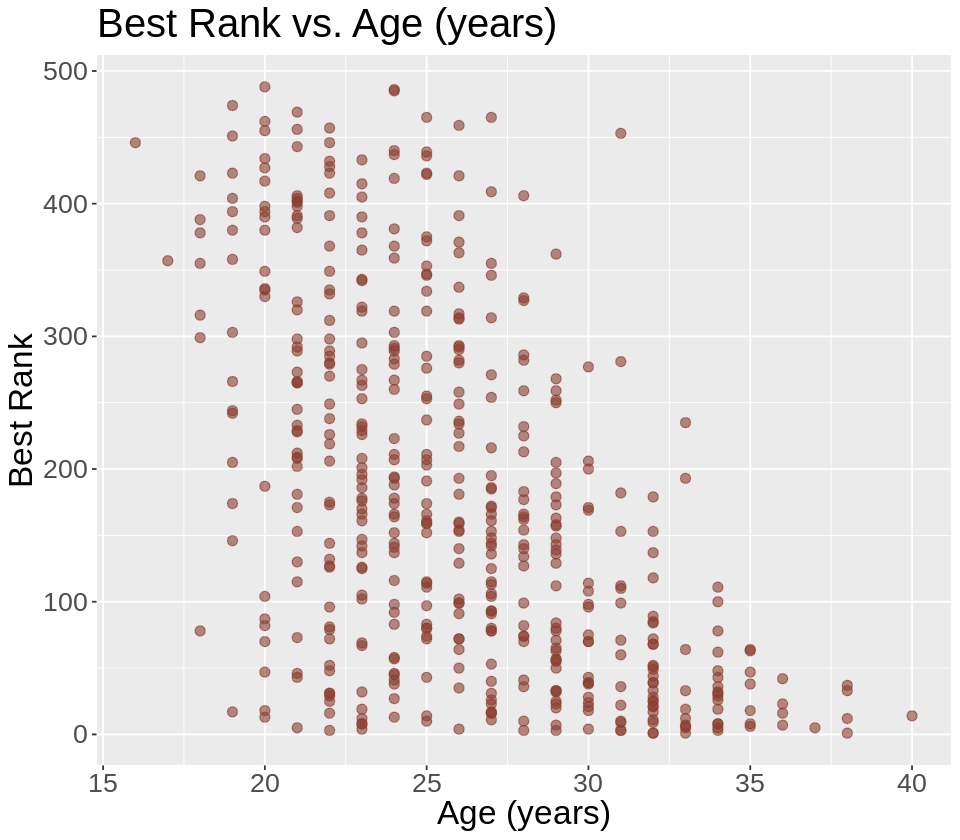

Warning message:
“Removed 480 rows containing missing values (geom_point).”


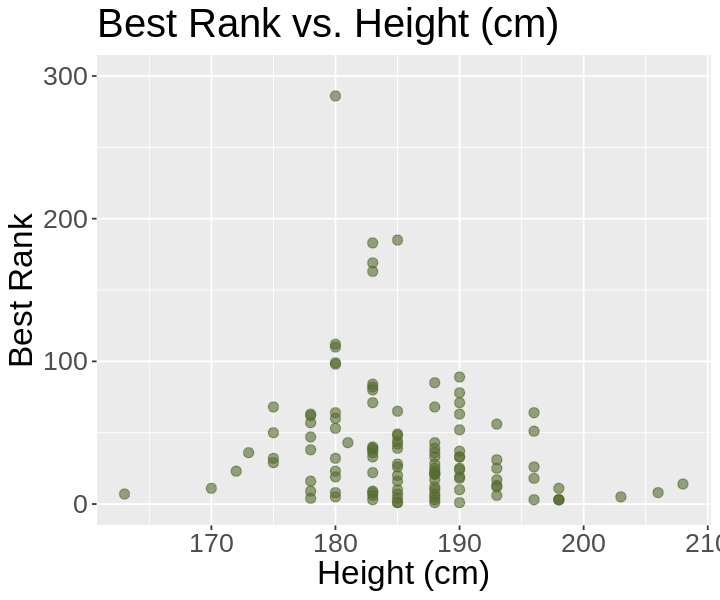

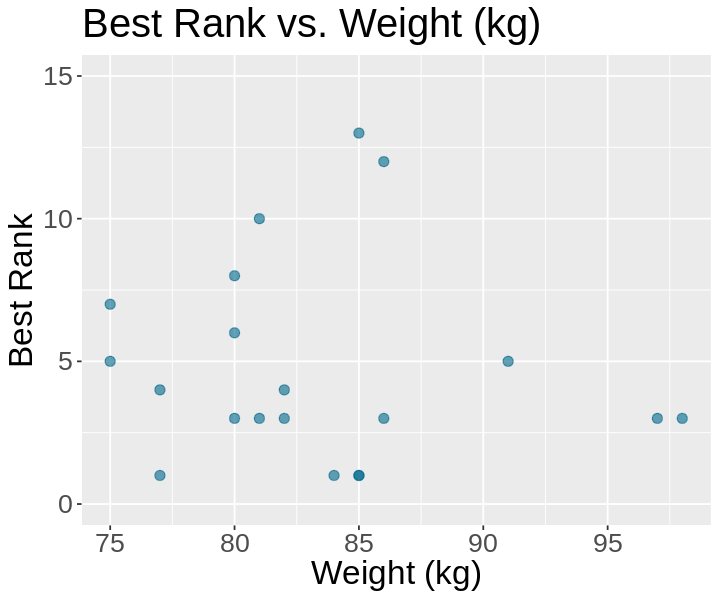

In [3]:
# visualizing data

point_alpha <- 0.6
point_size <- 2.5

theme_layer <- theme(text = element_text(size = 20))

age_plot <- tennis |>
                ggplot(aes(x = Age, y = Best.Rank)) +
                geom_point(alpha = point_alpha, colour = "coral4", size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot <- tennis |>
                ggplot(aes(x = Height, y = Best.Rank)) +
                geom_point(alpha = point_alpha, colour = "darkolivegreen", size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot <- tennis |>
                ggplot(aes(x = Weight, y = Best.Rank)) +
                geom_point(alpha = point_alpha, colour = "deepskyblue4", size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

options(repr.plot.width = 8, repr.plot.height = 7)
age_plot
options(repr.plot.width = 6, repr.plot.height = 5)
height_plot
options(repr.plot.width = 6, repr.plot.height = 5)
weight_plot

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 385 rows containing missing values (geom_point).”


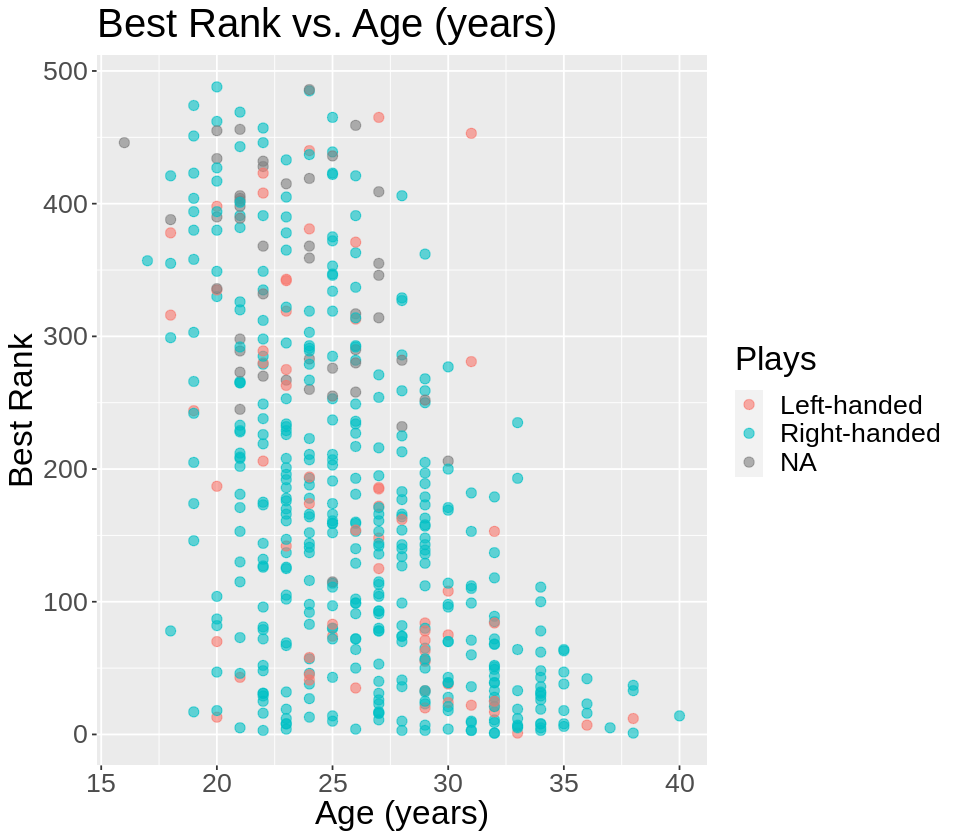

Warning message:
“Removed 480 rows containing missing values (geom_point).”


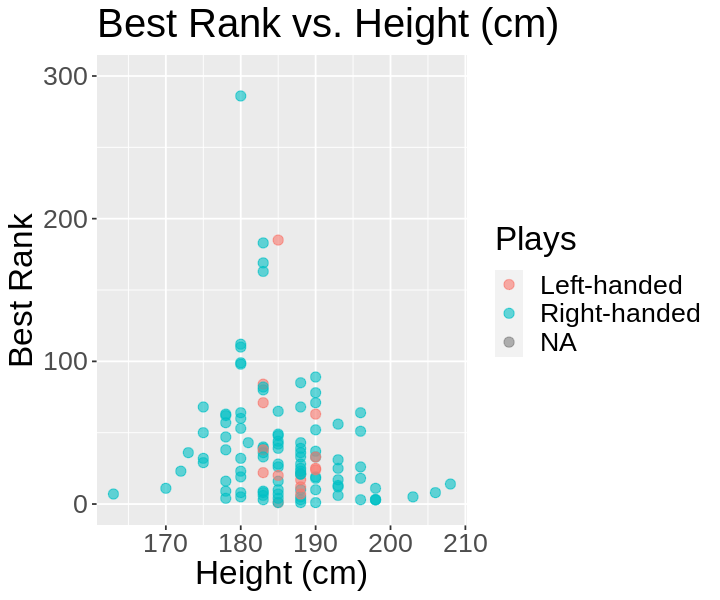

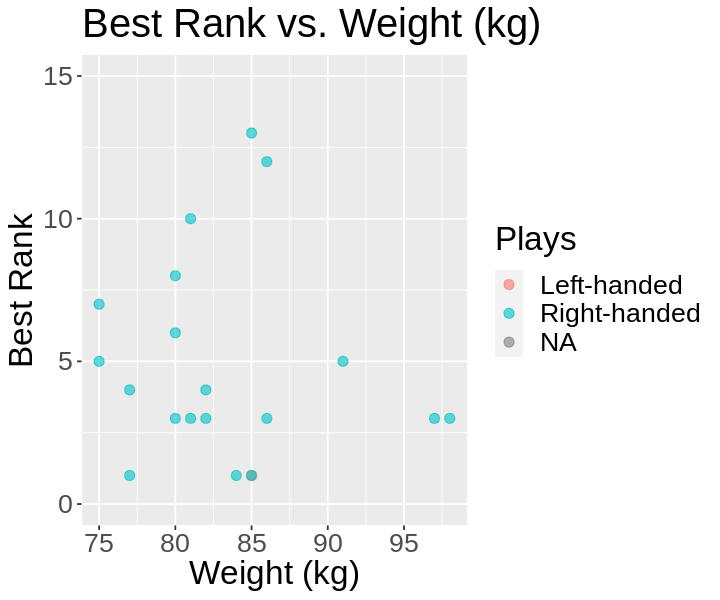

In [4]:
# with colouring by handedness

age_plot_c_p <- tennis |>
                ggplot(aes(x = Age, y = Best.Rank, colour = Plays)) +
                geom_point(alpha = point_alpha, size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot_c_p <- tennis |>
                ggplot(aes(x = Height, y = Best.Rank, colour = Plays)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot_c_p <- tennis |>
                ggplot(aes(x = Weight, y = Best.Rank, colour = Plays)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

options(repr.plot.width = 8, repr.plot.height = 7)
age_plot_c_p
options(repr.plot.width = 6, repr.plot.height = 5)
height_plot_c_p
options(repr.plot.width = 6, repr.plot.height = 5)
weight_plot_c_p

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 385 rows containing missing values (geom_point).”


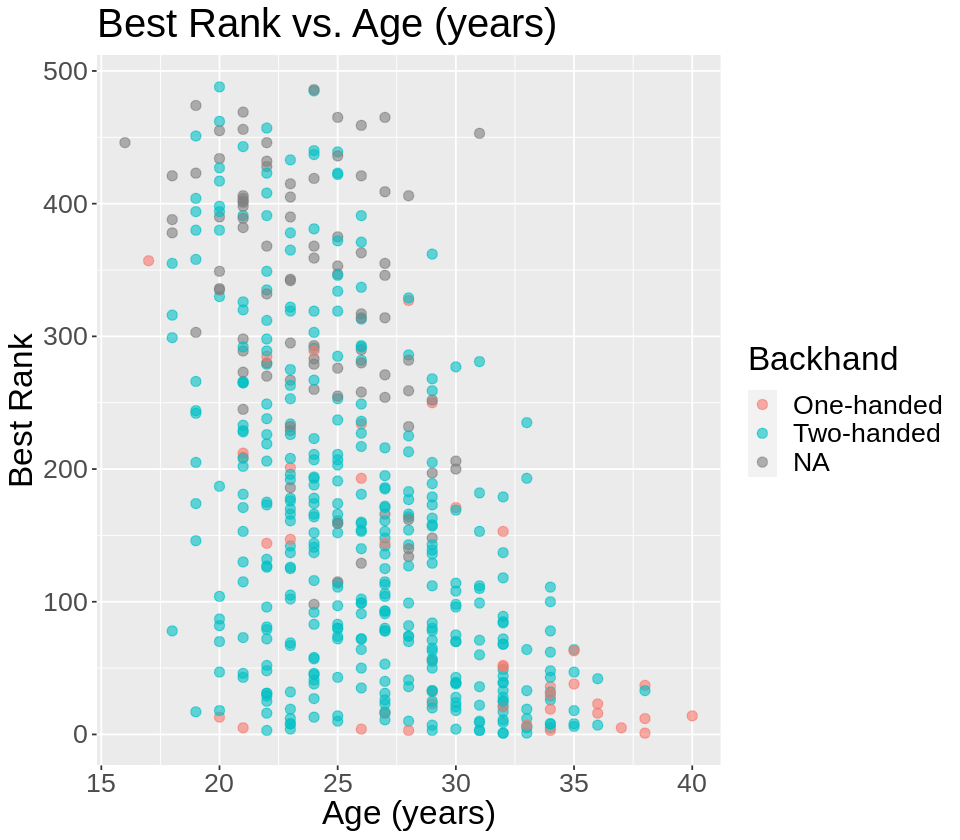

Warning message:
“Removed 480 rows containing missing values (geom_point).”


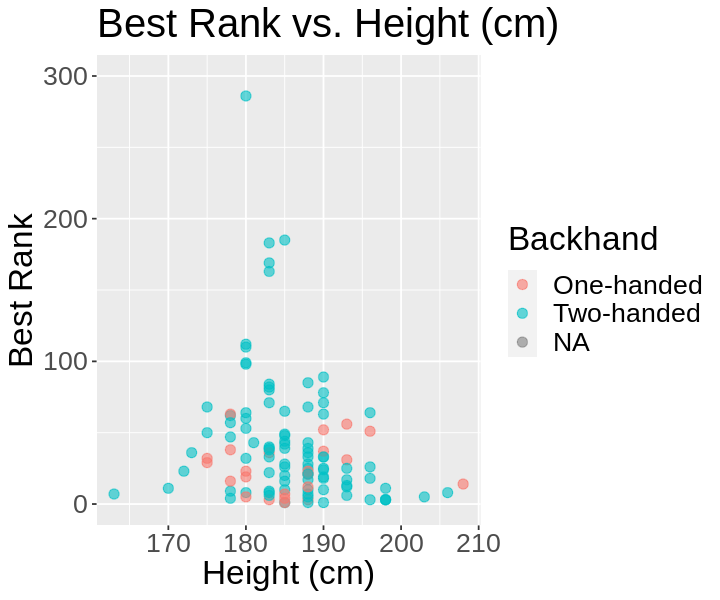

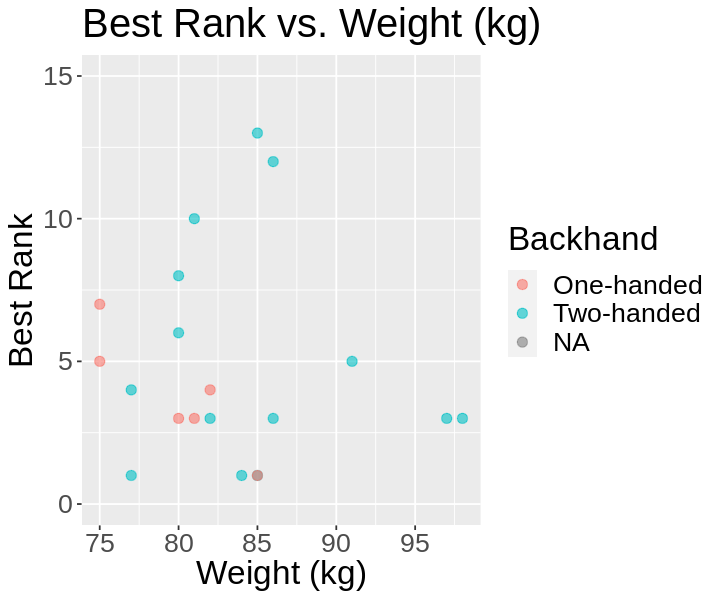

In [5]:
# with colouring by backhand

age_plot_c_bh <- tennis |>
                ggplot(aes(x = Age, y = Best.Rank, colour = Backhand)) +
                geom_point(alpha = point_alpha, size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot_c_bh <- tennis |>
                ggplot(aes(x = Height, y = Best.Rank, colour = Backhand)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot_c_bh <- tennis |>
                ggplot(aes(x = Weight, y = Best.Rank, colour = Backhand)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

options(repr.plot.width = 8, repr.plot.height = 7)
age_plot_c_bh
options(repr.plot.width = 6, repr.plot.height = 5)
height_plot_c_bh
options(repr.plot.width = 6, repr.plot.height = 5)
weight_plot_c_bh

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 385 rows containing missing values (geom_point).”


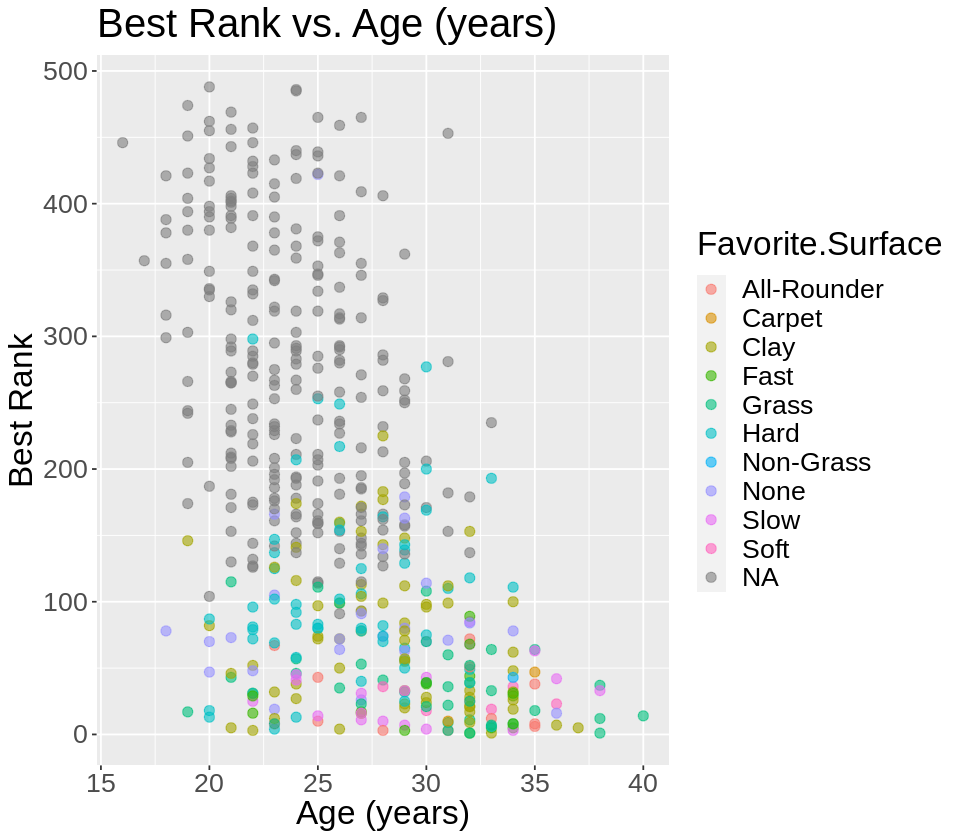

Warning message:
“Removed 480 rows containing missing values (geom_point).”


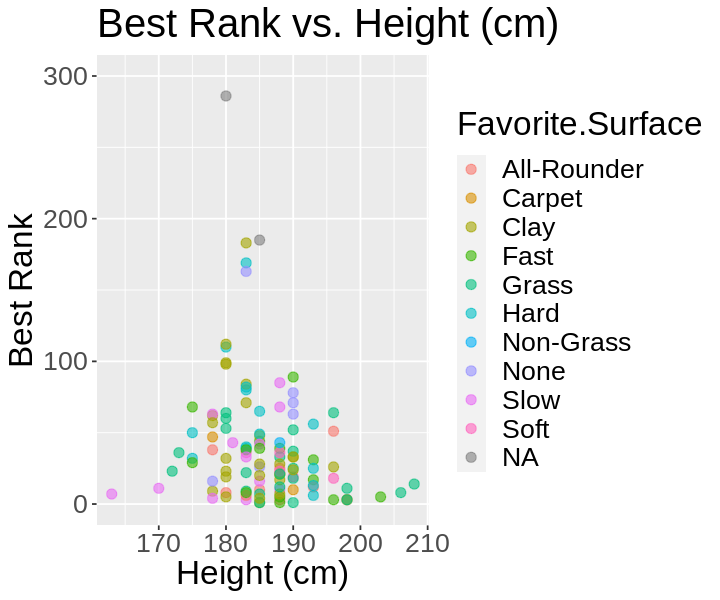

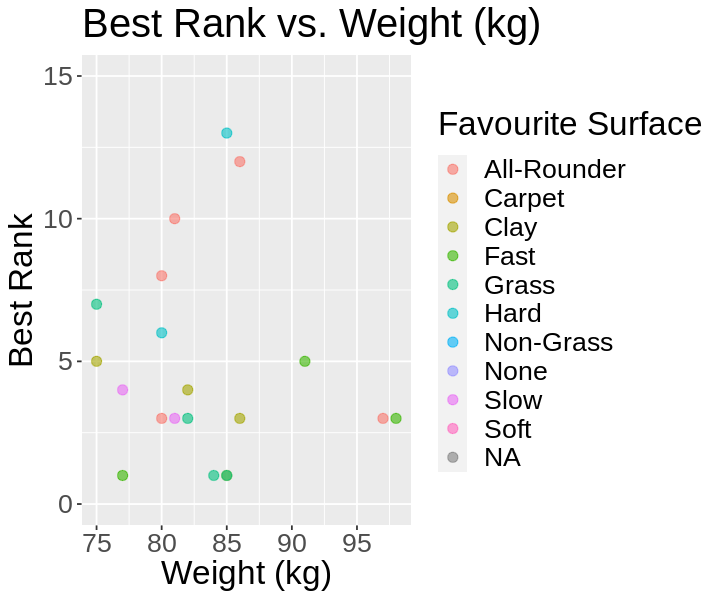

In [6]:
# with colouring by favourite surface

age_plot_c_fs <- tennis |>
                ggplot(aes(x = Age, y = Best.Rank, colour = Favorite.Surface)) +
                geom_point(alpha = point_alpha, size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot_c_fs <- tennis |>
                ggplot(aes(x = Height, y = Best.Rank, colour = Favorite.Surface)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot_c_fs <- tennis |>
                ggplot(aes(x = Weight, y = Best.Rank, colour = Favorite.Surface)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank", colour = "Favourite Surface") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

options(repr.plot.width = 8, repr.plot.height = 7)
age_plot_c_fs
options(repr.plot.width = 6, repr.plot.height = 5)
height_plot_c_fs
options(repr.plot.width = 6, repr.plot.height = 5)
weight_plot_c_fs